In [40]:
import pandas as pd 
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
def apply_stop_words_df(path ='../../data/predicted_prod_data.csv' ):
    df = pd.read_csv(path)
    stop = stopwords.words('english')
    clean_stop = lambda x: ' '.join([word for word in x.split() if word not in (stop)])
    df['text_clean'] = df['text'].apply(clean_stop)
    return df

In [3]:
def cleanse(row):
    row_clean = row.replace("-", " ")
    row_clean = re.sub("[\n]", " ",row_clean)
    row_clean = re.sub("[.!?/\()-,:]", "",row_clean)
    row_clean = row_clean.lower()
    return row_clean

In [4]:
def text_count(seq):
    text_dict = {}
    for row in seq:
        row_clean = cleanse(row)
        text = row_clean.split(" ")
        for word in text:
            if text != " ":
                if word.lower() not in text_dict.keys():
                    text_dict.update({f"{word.lower()}":1})
                else:
                    text_dict[f"{word.lower()}"]+=1

    return text_dict

In [5]:
df = apply_stop_words_df()
target_df = df[df.out == 1]
word_count = text_count(target_df.text_clean)

In [10]:
word_count_df = pd.DataFrame(word_count,index = [0]).rename(index = {0:'Word_Count'}).transpose()
word_count_df=word_count_df.sort_values(by=word_count_df.columns[0],ascending=False)
word_count_df['words'] = word_count_df.index

In [33]:
programs = pd.read_csv('../../data/languages.txt',delimiter= '\n',dtype = 'str')
programs['Languages'] = [x.split(" ")[0].lower() for x in programs.Languages]

<AxesSubplot:>

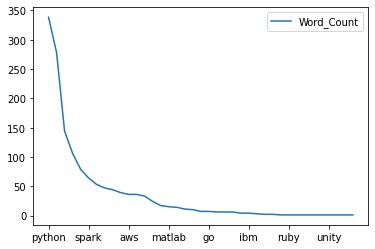

In [38]:
langauges_df = word_count_df.loc[word_count_df['words'].isin(programs['Languages'])]
langauges_df.plot()

In [44]:
px.pie(langauges_df,values = 'Word_Count',names = 'words',hole = .3)

In [42]:
langauges_df

,Word_Count,words
python,338,python
sql,278,sql
r,144,r
sas,106,sas
cloud,79,cloud
spark,64,spark
java,53,java
excel,47,excel
c,44,c
google,39,google
